In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

### Loading the data

In [2]:
df1=pd.read_csv("C:\\Users\\Masooma\\Heart Disease data.csv")

In [3]:
df1.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Attribute Information:

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 1 = fixed defect; 2 = normal; 3=reversable defect

In [4]:
df=df1.copy()

### Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
for i in df.columns:
    print(f"\n",df[i].value_counts().sort_index())
    
for i in df.columns:
    print(f"\n{i}\n",df[i].isnull().sum())
    


 age
29     4
34     6
35    15
37     6
38    12
39    14
40    11
41    32
42    26
43    26
44    36
45    25
46    23
47    18
48    23
49    17
50    21
51    39
52    43
53    26
54    53
55    30
56    39
57    57
58    68
59    46
60    37
61    31
62    37
63    32
64    34
65    27
66    25
67    31
68    12
69     9
70    14
71    11
74     3
76     3
77     3
Name: count, dtype: int64

 sex
0    312
1    713
Name: count, dtype: int64

 cp
0    497
1    167
2    284
3     77
Name: count, dtype: int64

 trestbps
94       7
100     14
101      3
102      6
104      3
105      9
106      3
108     21
110     64
112     30
114      4
115      9
117      4
118     24
120    128
122     14
123      4
124     20
125     38
126     10
128     39
129      3
130    123
132     28
134     17
135     20
136     11
138     45
140    107
142      9
144      6
145     17
146      8
148      7
150     55
152     17
154      4
155      3
156      3
160     36
164      3
165      4
170     1

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Renaming the columns

In [11]:
new_names=['age', 'sex', 'chest_pain', 'resting_bp', 'cholestrol', 'fasting_bsugar', 'resting_ECG', 
           'Max_heart_rate' ,'ex_angina', 'oldpeak', 'slope', 'No_maj_vessels', 'thalassemia', 'target']
df.columns=new_names
df.columns

Index(['age', 'sex', 'chest_pain', 'resting_bp', 'cholestrol',
       'fasting_bsugar', 'resting_ECG', 'Max_heart_rate', 'ex_angina',
       'oldpeak', 'slope', 'No_maj_vessels', 'thalassemia', 'target'],
      dtype='object')

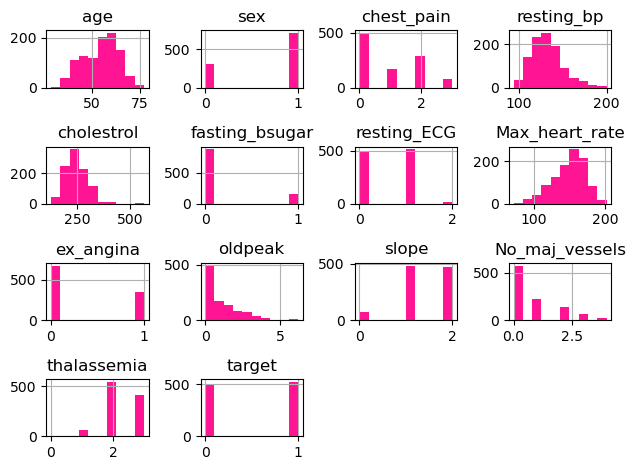

In [12]:
df.hist(color='deeppink')
plt.tight_layout()

# Show the plot
plt.show()

<Axes: >

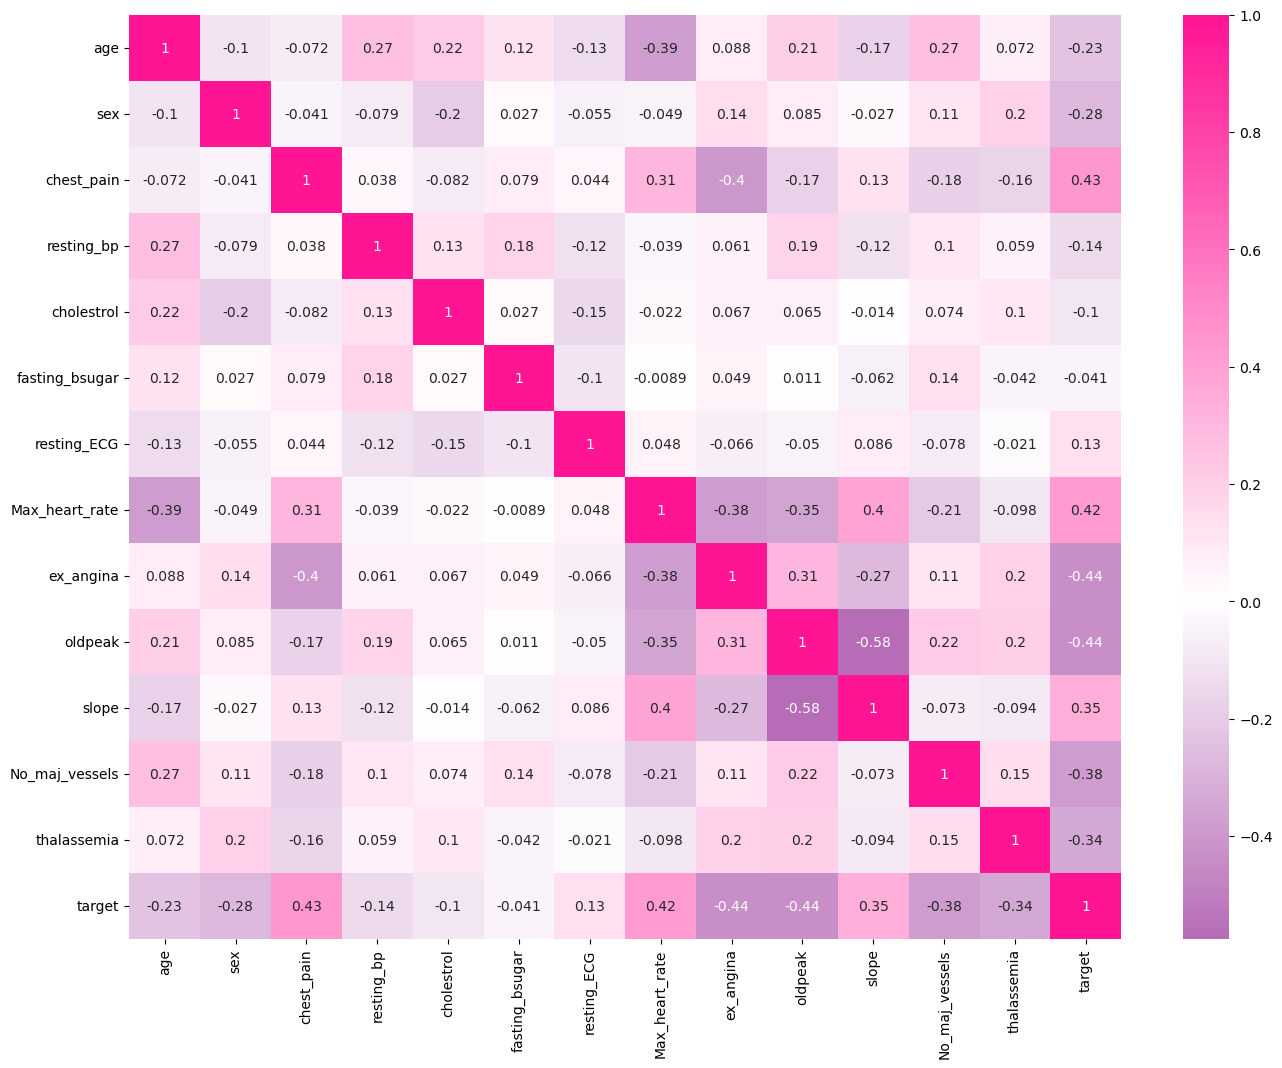

In [13]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(16, 12)) 

# Create a custom color palette that includes deep pink

custom_palette = LinearSegmentedColormap.from_list("custom", ["purple","white", "deeppink"])

sns.heatmap(df.corr(),annot=True,cmap=custom_palette,center=0)

<Axes: xlabel='target', ylabel='count'>

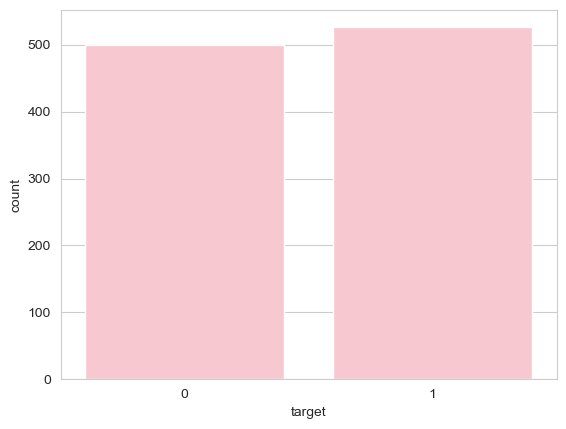

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df, palette=["pink"])

Target variable seems to be balanced

### Scaling

In [15]:


df =pd.get_dummies(df,columns=['sex', 'chest_pain', 'fasting_bsugar', 'resting_ECG',
                               'ex_angina', 'slope', 'No_maj_vessels', 'thalassemia'],dtype=int)
df

,age,resting_bp,cholestrol,Max_heart_rate,oldpeak,target,sex_0,sex_1,chest_pain_0,chest_pain_1,...,slope_2,No_maj_vessels_0,No_maj_vessels_1,No_maj_vessels_2,No_maj_vessels_3,No_maj_vessels_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
1021,60,125,258,141,2.8,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1022,47,110,275,118,1.0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1023,50,110,254,159,0.0,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [16]:
df.columns

Index(['age', 'resting_bp', 'cholestrol', 'Max_heart_rate', 'oldpeak',
       'target', 'sex_0', 'sex_1', 'chest_pain_0', 'chest_pain_1',
       'chest_pain_2', 'chest_pain_3', 'fasting_bsugar_0', 'fasting_bsugar_1',
       'resting_ECG_0', 'resting_ECG_1', 'resting_ECG_2', 'ex_angina_0',
       'ex_angina_1', 'slope_0', 'slope_1', 'slope_2', 'No_maj_vessels_0',
       'No_maj_vessels_1', 'No_maj_vessels_2', 'No_maj_vessels_3',
       'No_maj_vessels_4', 'thalassemia_0', 'thalassemia_1', 'thalassemia_2',
       'thalassemia_3'],
      dtype='object')

In [17]:
df['target'].dtype

dtype('int64')

### Train|Test Split

In [18]:
X=df.drop(columns=['target'])
y=df.target
y


0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)



In [20]:

X_train

,age,resting_bp,cholestrol,Max_heart_rate,oldpeak,sex_0,sex_1,chest_pain_0,chest_pain_1,chest_pain_2,...,slope_2,No_maj_vessels_0,No_maj_vessels_1,No_maj_vessels_2,No_maj_vessels_3,No_maj_vessels_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
315,42,148,244,178,0.8,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
204,66,146,278,152,0.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
363,53,130,246,173,0.0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
5,58,100,248,122,1.0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1017,53,123,282,95,2.0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,49,118,149,126,0.8,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
192,67,115,564,160,1.6,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
629,65,138,282,174,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
559,67,120,237,71,1.0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [21]:

X_test

,age,resting_bp,cholestrol,Max_heart_rate,oldpeak,sex_0,sex_1,chest_pain_0,chest_pain_1,chest_pain_2,...,slope_2,No_maj_vessels_0,No_maj_vessels_1,No_maj_vessels_2,No_maj_vessels_3,No_maj_vessels_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
807,44,130,233,179,0.4,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
27,58,136,319,152,0.0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
77,63,140,187,144,4.0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
406,58,140,211,165,0.0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
886,61,120,260,140,3.6,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,43,122,213,165,0.2,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
320,53,130,264,143,0.4,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
362,43,122,213,165,0.2,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
452,66,178,228,165,1.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


### Model Building

### Logistic Regression

In [22]:
train=[]
test=[]
CV=[]

for i in range(0,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    
    
    from sklearn.linear_model import LogisticRegression
    LogR=LogisticRegression()
    
    LogR.fit(X_train,y_train)
    y_pred_train_L=LogR.predict(X_train)
    
    y_pred_test_L=LogR.predict(X_test)
    
    from sklearn.metrics import accuracy_score
    train.append(accuracy_score(y_train,y_pred_train_L))
    test.append(accuracy_score(y_test,y_pred_test_L))
    
    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(LogR,X_train,y_train,cv=5,scoring='accuracy').mean())
    
ef=pd.DataFrame({'CV':CV,'train':train,'test':test})
gh=ef[(abs(ef['train']-ef['CV'])<0.05) & (abs(ef['train']-ef['test'])<0.05)]
rs=gh[gh['CV']==gh['CV'].max()].index.to_list()[0]

print(rs)

88


In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=88)

LogR=LogisticRegression()

LogR.fit(X_train,y_train)
y_pred_train_L=LogR.predict(X_train)
    
y_pred_test_L=LogR.predict(X_test)
    
print('train_R2: ',accuracy_score(y_train,y_pred_train_L))
print('test_R2: ',accuracy_score(y_test,y_pred_test_L))
print('CV: ',cross_val_score(LogR,X_train,y_train,cv=5,scoring='accuracy').mean())

train_R2:  0.8865853658536585
test_R2:  0.848780487804878
CV:  0.8817073170731708


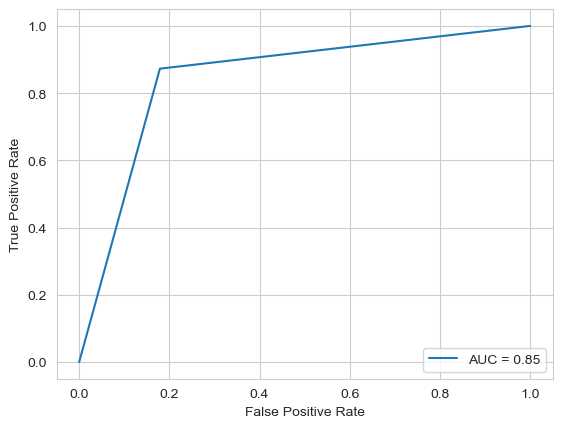

In [24]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test_L)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_test_L)

0.84688995215311

              precision    recall  f1-score   support

           0       0.85      0.82      0.83        95
           1       0.85      0.87      0.86       110

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



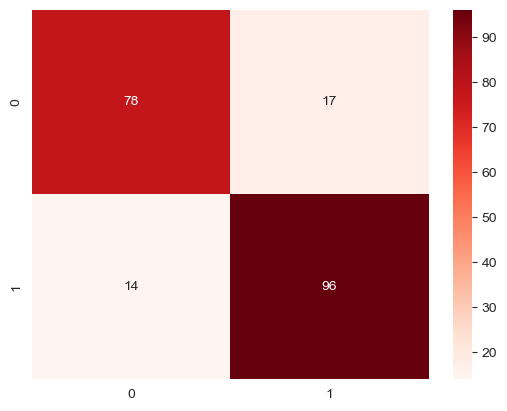

In [26]:
from sklearn.metrics import confusion_matrix,classification_report


CM=confusion_matrix(y_test,y_pred_test_L)
sns.heatmap(CM,annot=True,fmt='d',cmap='Reds')

print(classification_report(y_test,y_pred_test_L))

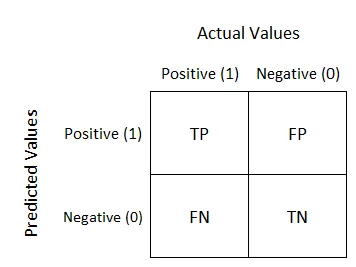

### KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,50))}

from sklearn.model_selection import GridSearchCV
knn_grid=GridSearchCV(Knn,param_grid,cv=5,scoring='accuracy')
knn_grid.fit(X_train,y_train)

knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [28]:
from sklearn import config_context

with config_context(enable_cython_pairwise_dist=False):
    knn_model=KNeighborsClassifier(n_neighbors=1)
    knn_model.fit(X_train, y_train)
    y_pred_train_K = knn_model.predict(X_train)
    y_pred_test_K = knn_model.predict(X_test)

    print('Train Accuracy: ', accuracy_score(y_train, y_pred_train_K))
    print('Test Accuracy: ', accuracy_score(y_test, y_pred_test_K))
    print('CV: ',cross_val_score(knn_model,X_train,y_train,cv=5,scoring='accuracy').mean())


Train Accuracy:  1.0
Test Accuracy:  1.0
CV:  0.9695121951219512


### DecisionTree

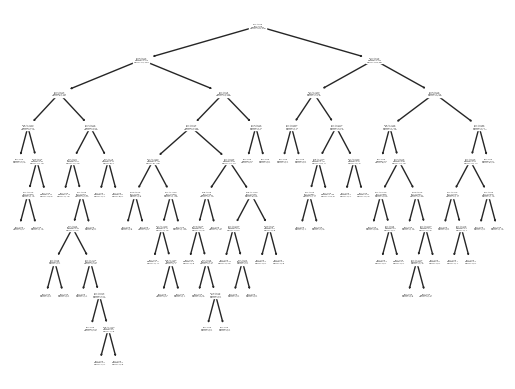

In [29]:
from sklearn.tree import DecisionTreeClassifier
md_dt=DecisionTreeClassifier(random_state=True)
md_dt.fit(X_train,y_train)
from  sklearn.tree import plot_tree
plot_tree(md_dt)
plt.show()

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt_est=DecisionTreeClassifier(random_state=88)
dtgrid={'criterion':['gini','entropy'],'max_depth':list(range(1,10))}

dt_grid=GridSearchCV(dt_est,dtgrid,cv=5,scoring='accuracy')
dt_grid.fit(X_train,y_train)
dt=dt_grid.best_estimator_

dt

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=88)

In [31]:
imp_fe=dt_grid.best_estimator_.feature_importances_
dt_impfe=pd.DataFrame(data=imp_fe,index=X.columns,columns=['imp feat'])
dt_impfe[dt_impfe['imp feat']>0].index.to_list()


['age',
 'resting_bp',
 'cholestrol',
 'Max_heart_rate',
 'oldpeak',
 'sex_0',
 'sex_1',
 'chest_pain_0',
 'chest_pain_3',
 'fasting_bsugar_0',
 'resting_ECG_0',
 'resting_ECG_1',
 'ex_angina_1',
 'slope_1',
 'slope_2',
 'No_maj_vessels_0',
 'No_maj_vessels_1',
 'No_maj_vessels_2',
 'thalassemia_1',
 'thalassemia_2',
 'thalassemia_3']

In [55]:
X_imp=['age',
 'resting_bp',
 'cholestrol',
 'Max_heart_rate',
 'oldpeak',
 'sex_0',
 'sex_1',
 'chest_pain_0',
 'chest_pain_3',
 'fasting_bsugar_0',
 'resting_ECG_0',
 'resting_ECG_1',
 'ex_angina_1',
 'slope_1',
 'slope_2',
 'No_maj_vessels_0',
 'No_maj_vessels_1',
 'No_maj_vessels_2',
 'thalassemia_1',
 'thalassemia_2',
 'thalassemia_3'
      ]


In [56]:
X_train_dt=X_train[X_imp]
X_test_dt=X_test[X_imp]

In [57]:


dt_model=DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=88)

dt_model.fit(X_train_dt,y_train)
ypred_train_dt=dt_model.predict(X_train_dt)

ypred_test_dt=dt_model.predict(X_test_dt)

print('DTrain: ',accuracy_score(y_train,ypred_train_dt))
print('DTest: ',accuracy_score(y_test,ypred_test_dt))
print('DCV: ',cross_val_score(dt_model,X_train_dt,y_train,cv=5,scoring='accuracy').mean())


DTrain:  1.0
DTest:  0.9853658536585366
DCV:  0.9731707317073169


### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rs_est=RandomForestClassifier(random_state=88)

rf_param_grid={'n_estimators':list(range(1,51))}

rf_grid=GridSearchCV(rs_est,rf_param_grid,cv=5,scoring='accuracy')

rf_grid.fit(X_train,y_train)
rf_grid.best_estimator_

RandomForestClassifier(n_estimators=17, random_state=88)

In [36]:
rf_impfe=rf_grid.best_estimator_.feature_importances_
RF_impfe=pd.DataFrame(data=rf_impfe,index=X.columns,columns=['important'])

RF_impfe[RF_impfe['important']>0].index.to_list()

['age',
 'resting_bp',
 'cholestrol',
 'Max_heart_rate',
 'oldpeak',
 'sex_0',
 'sex_1',
 'chest_pain_0',
 'chest_pain_1',
 'chest_pain_2',
 'chest_pain_3',
 'fasting_bsugar_0',
 'fasting_bsugar_1',
 'resting_ECG_0',
 'resting_ECG_1',
 'resting_ECG_2',
 'ex_angina_0',
 'ex_angina_1',
 'slope_0',
 'slope_1',
 'slope_2',
 'No_maj_vessels_0',
 'No_maj_vessels_1',
 'No_maj_vessels_2',
 'No_maj_vessels_3',
 'No_maj_vessels_4',
 'thalassemia_0',
 'thalassemia_1',
 'thalassemia_2',
 'thalassemia_3']

In [59]:
RF_Ximp=['age',
 'resting_bp',
 'cholestrol',
 'Max_heart_rate',
 'oldpeak',
 'sex_0',
 'sex_1',
 'chest_pain_0',
 'chest_pain_1',
 'chest_pain_2',
 'chest_pain_3',
 'fasting_bsugar_0',
 'fasting_bsugar_1',
 'resting_ECG_0',
 'resting_ECG_1',
 'resting_ECG_2',
 'ex_angina_0',
 'ex_angina_1',
 'slope_0',
 'slope_1',
 'slope_2',
 'No_maj_vessels_0',
 'No_maj_vessels_1',
 'No_maj_vessels_2',
 'No_maj_vessels_3',
 'No_maj_vessels_4',
 'thalassemia_0',
 'thalassemia_1',
 'thalassemia_2',
 'thalassemia_3']



In [60]:
X_train_RF=X_train[RF_Ximp]
X_test_RF=X_test[RF_Ximp]

In [61]:
rs_model=RandomForestClassifier(n_estimators=17,random_state=88)

rs_model.fit(X_train_RF,y_train)

ypred_train_RF =rs_model.predict(X_train_RF)
print('RFTrain: ',accuracy_score(y_train,ypred_train_RF))

ypred_test_RF =rs_model.predict(X_test_RF)
print('RFTest: ',accuracy_score(y_test,ypred_test_RF))

print('RF_CV: ',cross_val_score(rs_model,X_train_RF,y_train,cv=5,scoring='accuracy').mean())


RFTrain:  1.0
RFTest:  1.0
RF_CV:  0.9841463414634146


### ADABoost

In [40]:
from sklearn.ensemble import AdaBoostClassifier
ADest=AdaBoostClassifier()

ADparam_grid={'n_estimators':list(range(1,51))}

AD_grid=GridSearchCV(ADest,ADparam_grid,cv=5,scoring='accuracy')

AD_grid.fit(X_train,y_train)
AD=AD_grid.best_estimator_

AD

AdaBoostClassifier(n_estimators=48)

In [41]:
impfe=AD.feature_importances_
AD_imp=pd.DataFrame(data=impfe,index=X.columns,columns=['Ad_imp'])
Ada_imp=AD_imp[AD_imp['Ad_imp']>0].index.to_list()
Ada_imp

['age',
 'resting_bp',
 'cholestrol',
 'Max_heart_rate',
 'oldpeak',
 'sex_0',
 'sex_1',
 'chest_pain_0',
 'resting_ECG_1',
 'ex_angina_0',
 'slope_1',
 'No_maj_vessels_0',
 'No_maj_vessels_2',
 'No_maj_vessels_4',
 'thalassemia_1',
 'thalassemia_2']

In [42]:
X_train_ad=X_train[Ada_imp]
X_test_ad=X_test[Ada_imp]

In [43]:
AD.fit(X_train_ad,y_train)

ypred_train_AD=AD.predict(X_train_ad)
print('ADTrain: ',accuracy_score(y_train,ypred_train_AD))

ypred_test_AD=AD.predict(X_test_ad)
print('ADTest: ',accuracy_score(y_test,ypred_test_AD))

print('ADCV: ',cross_val_score(AD,X_train_ad,y_train,cv=5,scoring='accuracy').mean())

ADTrain:  0.9280487804878049
ADTest:  0.8926829268292683
ADCV:  0.9012195121951219


### GradientBoost

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
G_est=GradientBoostingClassifier(random_state=88)

Gparam_grid={'n_estimators':list(range(1,20)),
             'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
G_grid=GridSearchCV(G_est,Gparam_grid,cv=5,scoring='accuracy')
G_grid.fit(X_train,y_train)
GD=G_grid.best_estimator_

GD

GradientBoostingClassifier(learning_rate=0.9, n_estimators=19, random_state=88)

In [45]:
Gb_imp=GD.feature_importances_
Gb_imp=pd.DataFrame(data=Gb_imp,index=X.columns,columns=['GB_imp'])
GB_impfe=Gb_imp[Gb_imp['GB_imp']>0].index.to_list()
GB_impfe

['age',
 'resting_bp',
 'cholestrol',
 'Max_heart_rate',
 'oldpeak',
 'sex_0',
 'sex_1',
 'chest_pain_0',
 'chest_pain_1',
 'chest_pain_2',
 'chest_pain_3',
 'resting_ECG_0',
 'resting_ECG_1',
 'ex_angina_0',
 'ex_angina_1',
 'slope_0',
 'slope_1',
 'slope_2',
 'No_maj_vessels_0',
 'No_maj_vessels_3',
 'No_maj_vessels_4',
 'thalassemia_0',
 'thalassemia_1',
 'thalassemia_2',
 'thalassemia_3']

In [46]:
X_train_GB=X_train[GB_impfe]

In [47]:
X_test_GB=X_test[GB_impfe]

In [48]:
GD.fit(X_train_GB,y_train)
ypred_train_GB=GD.predict(X_train_GB)
ypred_test_GB=GD.predict(X_test_GB)

print('GBTrain: ',accuracy_score(y_train,ypred_train_GB))
print('GBTest: ',accuracy_score(y_test,ypred_test_GB))
print('GBCV: ',cross_val_score(GD,X_train_GB,y_train,cv=5,scoring='accuracy').mean())

GBTrain:  0.998780487804878
GBTest:  0.9902439024390244
GBCV:  0.9792682926829268


### Xtreme Gradient

In [49]:
from xgboost import XGBClassifier

XG_est=XGBClassifier()

XGparam_grid={'n_estimators':[10,20,40,100],'max_depth':[3,4,5],
              'gamma':[0,0.15,0.3,0.5,1]}

XG_grid=GridSearchCV(XG_est,XGparam_grid,cv=5,scoring='accuracy')

XG_grid.fit(X_train,y_train)
XG=XG_grid.best_estimator_
XG

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
X_impfe=XG.feature_importances_
Ximp=pd.DataFrame(data=X_impfe,index=X.columns,columns=['XG_imp'])
XGFeat=Ximp[Ximp['XG_imp']>0].index.to_list()

XGFeat


['age',
 'resting_bp',
 'cholestrol',
 'Max_heart_rate',
 'oldpeak',
 'sex_0',
 'chest_pain_0',
 'chest_pain_1',
 'chest_pain_2',
 'chest_pain_3',
 'fasting_bsugar_0',
 'resting_ECG_0',
 'resting_ECG_1',
 'ex_angina_0',
 'slope_0',
 'slope_1',
 'slope_2',
 'No_maj_vessels_0',
 'No_maj_vessels_1',
 'No_maj_vessels_2',
 'No_maj_vessels_3',
 'thalassemia_1',
 'thalassemia_2',
 'thalassemia_3']

In [51]:
X_train_xg=X_train[XGFeat]
X_test_xg=X_test[XGFeat]

In [52]:
XG.fit(X_train_xg,y_train)

ypred_trainXG=XG.predict(X_train_xg)
ypred_testXG=XG.predict(X_test_xg)

print('XGTrain: ',accuracy_score(y_train,ypred_trainXG))
print('XGTest: ',accuracy_score(y_test,ypred_testXG))
print('XGCV: ',cross_val_score(XG,X_train_xg,y_train,cv=5,scoring='accuracy').mean())

XGTrain:  1.0
XGTest:  1.0
XGCV:  0.9829268292682928


### Xtreme Gradient(XG) is the best, as it is also giving 100% accuracy but with lesser number of features.

In [53]:
import pickle

In [62]:
pickle.dump(XG,open('Xtreme_gradient_model.pkl','wb'))

In [1]:
pip install streamlit


  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/b0/68/cf905fd2db4a84dc9b46803512b9765a3e9a6dfaa378a67c8db910c44ab3/streamlit-1.37.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/07/92/485d136f850e89e5dd0b60047b539453c50be3782308447a4951fe2dc6bd/altair-5.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/bb/2a/10164ed1f31196a2f7f3799368a821765c62851ead0e630ab52b8e14b4d0/blinker-1.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for rich<14,>=10.14.0 from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/rich-13.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for gitpython!=3.1.19,<4,>=3.0.7 from https://files.pythonhosted.org/packages/e9/bd/cc3a402a6439c15c3d4294333e13042b915bbeab54edc457c72